In [2]:
!ls

cholec_12_3    cholec_copy	      data_analysis.ipynb   results.xlsx
cholec_13_2    cholecSeg8k.xlsx       data_analysis.py	    synapse
cholec_1_test  cholecSegClasses.json  image_transfer.ipynb  vis_plots
cholec_23_1    cholec_test	      results.csv


In [1]:
import json

f = open('cholecSegClasses.json')
data = json.load(f)
print(data)

{'classes': [{'id': '0', 'name': 'Black Background', 'color': '[127,127,127]', 'super-category': 'misc'}, {'id': '1', 'name': 'Abdominal Wall', 'color': '[210,140,140]', 'super-category': 'organ'}, {'id': '2', 'name': 'Liver', 'color': '[255,114,114]', 'super-category': 'organ'}, {'id': '3', 'name': 'Gastrointestinal Tract', 'color': '[231,70,156]', 'super-category': 'organ'}, {'id': '4', 'name': 'Fat', 'color': '[186,183,75]', 'super-category': 'organ'}, {'id': '5', 'name': 'Grasper', 'color': '[170,255,0]', 'super-category': 'instrument'}, {'id': '6', 'name': 'Connective Tissue', 'color': '[255,85,0]', 'super-category': 'organ'}, {'id': '7', 'name': 'Blood', 'color': '[255,0,0]', 'super-category': 'fluid'}, {'id': '8', 'name': 'Cystic Duct', 'color': '[255,255,0]', 'super-category': 'organ'}, {'id': '9', 'name': 'L-hook Electrocautery', 'color': '[169,255,184]', 'super-category': 'instrument'}, {'id': '10', 'name': 'Gallblader', 'color': '[255,160,165]', 'super-category': 'organ'}, {

In [2]:
cholec_12_3 = [0.9780, 0.8549, 0.7163, 0.0462, 0.8423, 0.5312, 0.0000, 0.0000, 0.0000, 0.4068, 0.6821, 0.0000, 0.0000]
cholec_13_2 = [0.9398, 0.7172, 0.7825, 0.6270, 0.8006, 0.4588, 0.0000, 0.0000, 0.0000, 0.0000, 0.6241, 0.0000, 0.0000]
cholec_23_1 = [0.9634, 0.6612, 0.7420, 0.5992, 0.6336, 0.3896, 0.0000, 0.0000, 0.0000, 0.3420, 0.5792, 0.0000, 0.0000]

In [3]:
classes = [data['classes'][x]['name'] for x in range(0,13)]

In [4]:
print(classes)

['Black Background', 'Abdominal Wall', 'Liver', 'Gastrointestinal Tract', 'Fat', 'Grasper', 'Connective Tissue', 'Blood', 'Cystic Duct', 'L-hook Electrocautery', 'Gallblader', 'Hepatic Vein', 'Liver Ligament']


In [5]:
import pandas as pd
file_name = 'cholecSeg8k.xlsx' 
df = pd.read_excel(file_name)
print(df.head())

   Unnamed: 0                   Label    video01   video37    video52  \
0           0        Black Background   90712229  81850098   88598921   
1           1          Abdominal Wall   29147162  35101525  119538271   
2           2                   Liver  210235771  18713478   36931952   
3           3  Gastrointestinal Tract    8114228         0          0   
4           4                     Fat   28650061  31909668   49888607   

    video55   video09   video25   video48   video12    video24   video35  \
0  28079910  15957950  44759608  38998725  90055534  157037487   5715866   
1   7669154  26790568  26568831  17423242  32532244  101118555         0   
2  19980611  18366772  20400350  18313712  54190842   61158730  50079991   
3   9800738   6817444   1229182   1836972   4175857   10195950         0   
4   7433421  16078099  25077865  15718929  36325627   45493986  19178441   

    video26   video28   video17    video43   video20   video18   video27  
0  39514011  34229694  300252

In [6]:
i = "01"
df.loc[df['Label'] == 'Black Background']
videos = df.columns

videos = videos[2:-1]
j = videos[3][-2:]
df


,Unnamed: 0,Label,video01,video37,video52,video55,video09,video25,video48,video12,video24,video35,video26,video28,video17,video43,video20,video18,video27
0,0,Black Background,90712229,81850098,88598921,28079910,15957950,44759608,38998725,90055534,157037487,5715866,39514011,34229694,30025225,81682122,6976627,4624912,38485281
1,1,Abdominal Wall,29147162,35101525,119538271,7669154,26790568,26568831,17423242,32532244,101118555,0,16348686,67121270,44175621,113637479,9743602,1458566,65880325
2,2,Liver,210235771,18713478,36931952,19980611,18366772,20400350,18313712,54190842,61158730,50079991,41846938,44809410,16448695,25705821,22908346,27954945,16019405
3,3,Gastrointestinal Tract,8114228,0,0,9800738,6817444,1229182,1836972,4175857,10195950,0,9772906,5187264,2298180,0,1154207,320020,1387754
4,4,Fat,28650061,31909668,49888607,7433421,16078099,25077865,15718929,36325627,45493986,19178441,13839748,57428507,24609255,60871167,9189477,11520718,34070079
5,5,Grasper,9227987,4696961,5625879,5820883,0,5714902,1132731,4353986,3751868,5481400,1392225,14045325,1490720,5001818,5923362,3086023,3393566
6,6,Connective Tissue,52817014,0,0,0,0,0,0,22263225,0,0,0,0,0,0,0,0,0
7,7,Blood,13991063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,8,Cystic Duct,1155391,0,0,0,0,0,0,3,0,0,0,0,66817,0,0,0,0
9,9,L-hook Electrocautery,17423695,2106407,3858283,3942327,0,0,306,6721305,0,0,0,0,253,0,3032279,6300169,0


In [9]:
df['part1'] = 0
for v in videos: 
    i = v[-2:]
    if int(i) < 23:
        df['part1']+=df['video'+i]

In [10]:
df['part2'] = 0
for v in videos: 
    i = v[-2:]
    if int(i) > 23 and int(i) < 36:
        df['part2']+=df['video'+i]

In [11]:
df['part3'] = 0
for v in videos: 
    i = v[-2:]
    if int(i) > 36:
        df['part3']+=df['video'+i]

In [12]:
cholec_12_3.append(0)
df['12_3'] = cholec_12_3

In [13]:
cholec_13_2.append(0)
df['13_2'] = cholec_13_2
cholec_23_1.append(0)
df['23_1'] = cholec_23_1

In [14]:
df = df.rename(columns={"part1": "fold 1", "part2": "fold 2", "part3": "fold 3", "invalid": "Invalid"}) 
                        #"13_2": "fold 1&3", "12_3": "fold 1&2", "23_1": "fold 2&3"}
df

,Unnamed: 0,Label,video01,video37,video52,video55,video09,video25,video48,video12,...,video43,video20,video18,video27,fold 1,fold 2,fold 3,12_3,13_2,23_1
0,0,Black Background,90712229,81850098,88598921,28079910,15957950,44759608,38998725,90055534,...,81682122,6976627,4624912,38485281,238352477,281256666,319209776,0.9780,0.9398,0.9634
1,1,Abdominal Wall,29147162,35101525,119538271,7669154,26790568,26568831,17423242,32532244,...,113637479,9743602,1458566,65880325,143847763,211157342,293369671,0.8549,0.7172,0.6612
2,2,Liver,210235771,18713478,36931952,19980611,18366772,20400350,18313712,54190842,...,25705821,22908346,27954945,16019405,350105371,218295419,119645574,0.7163,0.7825,0.7420
3,3,Gastrointestinal Tract,8114228,0,0,9800738,6817444,1229182,1836972,4175857,...,0,1154207,320020,1387754,22879936,26385302,11637710,0.0462,0.6270,0.5992
4,4,Fat,28650061,31909668,49888607,7433421,16078099,25077865,15718929,36325627,...,60871167,9189477,11520718,34070079,126373237,161018547,165821792,0.8423,0.8006,0.6336
5,5,Grasper,9227987,4696961,5625879,5820883,0,5714902,1132731,4353986,...,5001818,5923362,3086023,3393566,24082078,30385720,22278272,0.5312,0.4588,0.3896
6,6,Connective Tissue,52817014,0,0,0,0,0,0,22263225,...,0,0,0,0,75080239,0,0,0.0000,0.0000,0.0000
7,7,Blood,13991063,0,0,0,0,0,0,0,...,0,0,0,0,13991063,0,0,0.0000,0.0000,0.0000
8,8,Cystic Duct,1155391,0,0,0,0,0,0,3,...,0,0,0,0,1222211,0,0,0.0000,0.0000,0.0000
9,9,L-hook Electrocautery,17423695,2106407,3858283,3942327,0,0,306,6721305,...,0,3032279,6300169,0,33477701,0,9907323,0.4068,0.0000,0.3420


In [17]:
df['mean_acc'] = (df['12_3']+df['13_2']+df['23_1'])/3

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Label'>

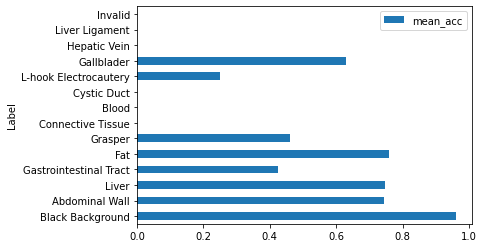

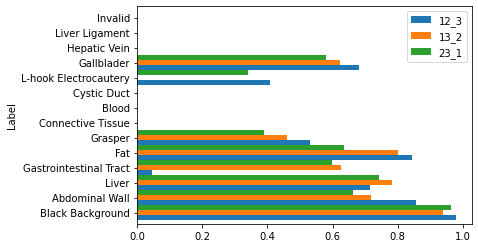

In [18]:
df.plot(x='Label',y=['mean_acc'],kind="barh")
df.plot(x='Label', y=['12_3', '13_2', '23_1'], kind="barh", width=1)

In [77]:
df['fold 1&2'] = df['fold 1']+df['fold 2']
df['fold 1&3'] = df['fold 1']+df['fold 3']
df['fold 2&3'] = df['fold 2']+df['fold 3']
df['entire dataset'] = df['fold 1']+df['fold 2']+df['fold 3']

Text(0.5, 1.0, 'Pixel Distribution of Validation Set')

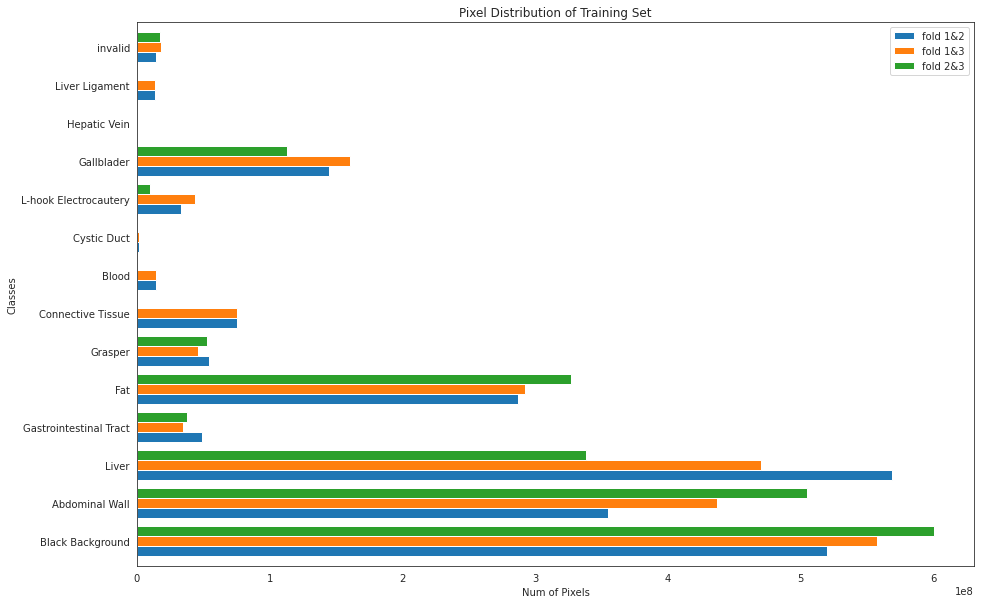

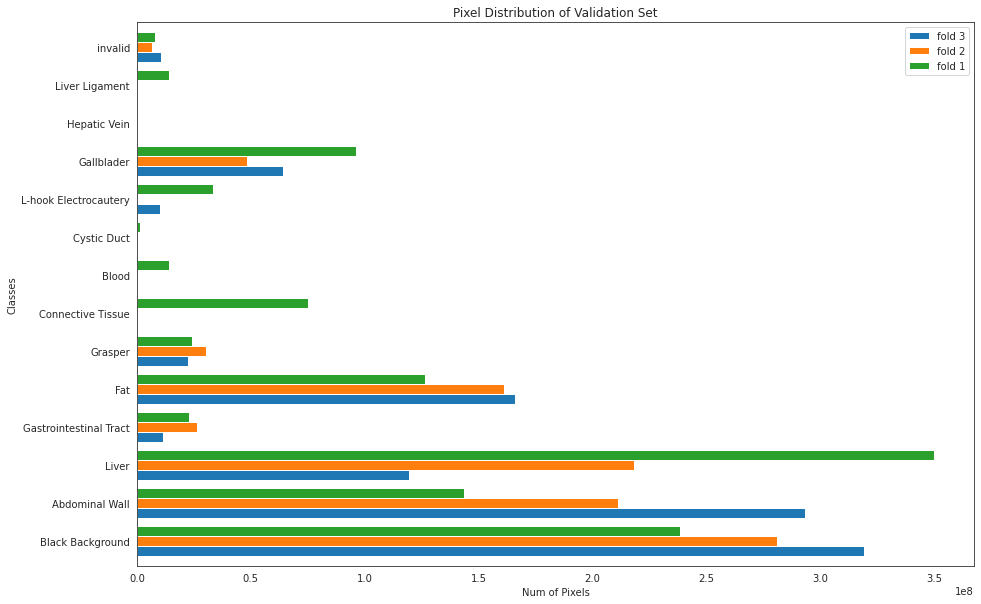

In [103]:
df.plot(x='Label', y=['fold 1&2', 'fold 1&3', 'fold 2&3'], kind="barh", width=0.8, figsize=(15, 10))
plt.xlabel('Num of Pixels')
plt.ylabel("Classes")
plt.title('Pixel Distribution of Training Set')
df.plot(x='Label', y=['fold 3', 'fold 2', 'fold 1'], kind="barh", width=0.8, figsize=(15, 10))
plt.xlabel('Num of Pixels')
plt.ylabel("Classes")
plt.title('Pixel Distribution of Validation Set')

Text(0.5, 1.0, 'Pixel Distribution of Training Set')

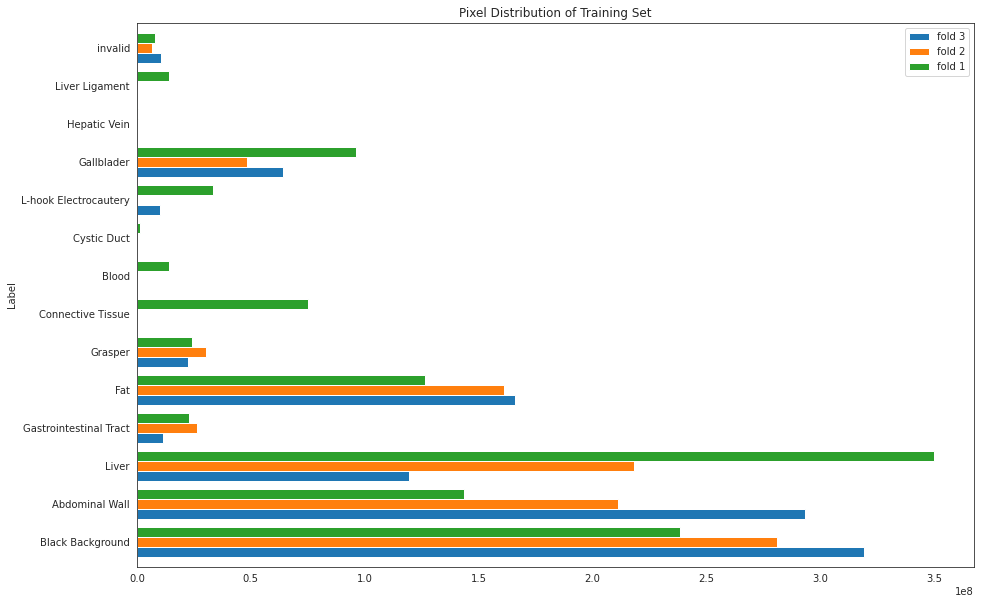

In [38]:
df.plot(x='Label', y=['fold 3', 'fold 2', 'fold 1'], kind="barh", width=0.8, figsize=(15, 10))
plt.title('Pixel Distribution of Training Set')

In [19]:
mean = (0.3890577858883473+0.3807749287044323+0.37770934558367625)/3
print(mean)

0.3825140200588186


In [44]:
# import seaborn, pyplot (for plotting), and pandas (to build the dataframe)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Classes')

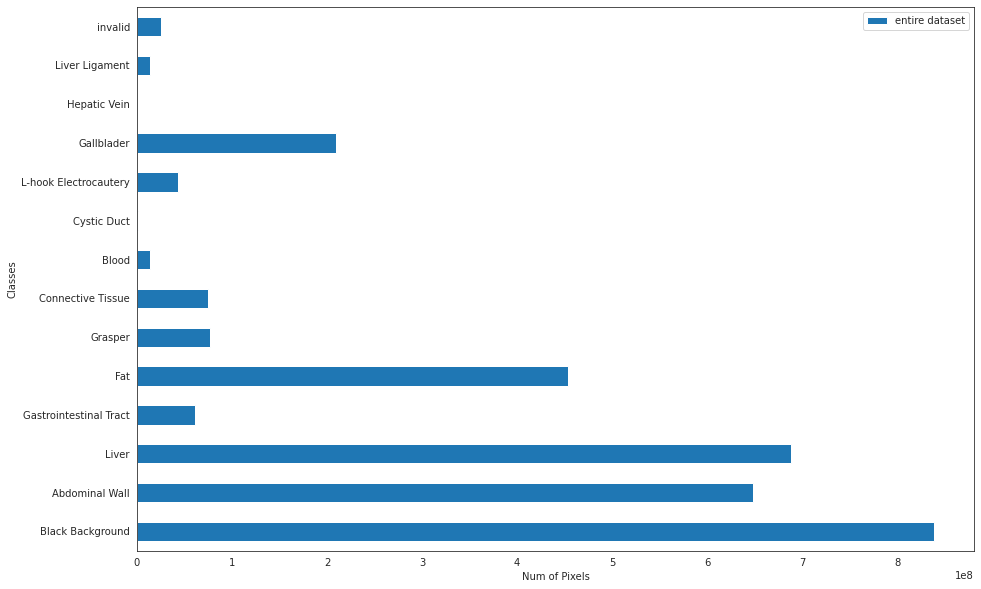

In [98]:
sns.set_style("white")
df.plot(x='Label', y=['entire dataset'], kind='barh',figsize=(15, 10))
plt.xlabel('Num of Pixels')
plt.ylabel('Classes')

In [42]:
def brokenPlot(dx,dy,df,leftHighLim,lowLim,highLim):
    new_style = {'grid': False}
    sns.set_style("white")
    f, (ax,ax2) = plt.subplots(ncols=2, nrows=1, sharex='col',figsize=(15,10))

    # plot the same data on both axes
    ax = sns.barplot(x=dx, y=dy, data=df, ax=ax, orient='h')
    ax2 = sns.barplot(x=dx, y=dy, data=df, ax=ax2, orient='h')

    # zoom-in / limit the view to different portions of the data
    ax2.set_xlim(lowLim, highLim)  # outliers only
    ax.set_xlim(0, leftHighLim)  # most of the data

    # hide the spines between ax and ax2
    ax.spines['left'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax.yaxis.tick_left()
    ax2.get_yaxis().set_visible(False)
    ax2.set_xlabel('Num of Pixels')
    #ax2.tick_params(labelleft=False)  # don't put tick labels at the top
    #ax2.yaxis.tick_right()
    ax.set_ylabel("Classes")
    ax2.set_ylabel("")

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)       
    ax.plot((1-d, 1+d), (-d, +d), **kwargs) 

    kwargs.update(transform=ax2.transAxes)  
    ax2.plot((-d, +d), (1- d, 1+ d), **kwargs)  
    ax2.plot((-d, +d), (-d, +d), **kwargs)  
    
    ax.invert_yaxis()
    ax2.invert_yaxis()

    plt.show()

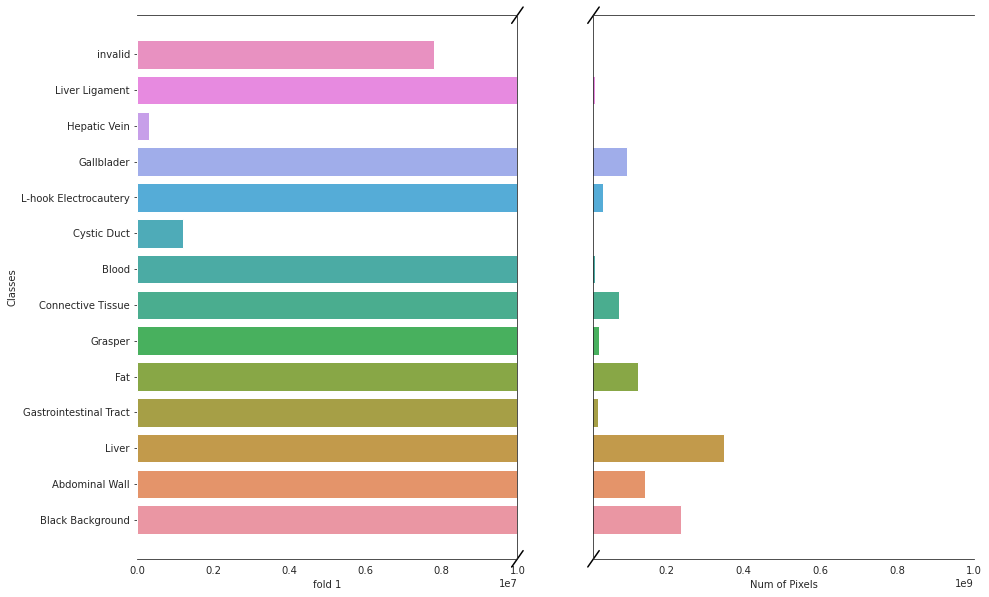

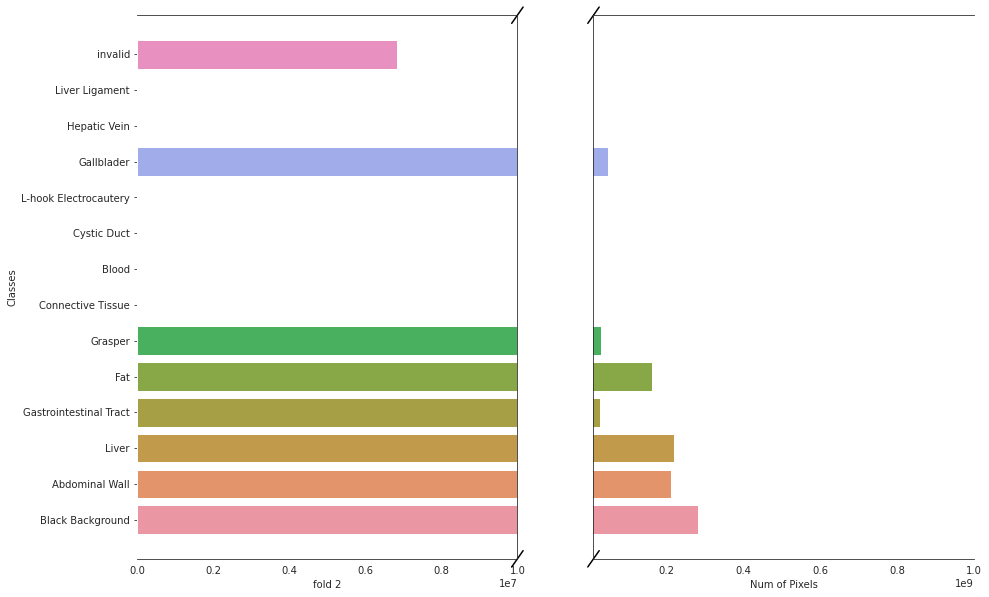

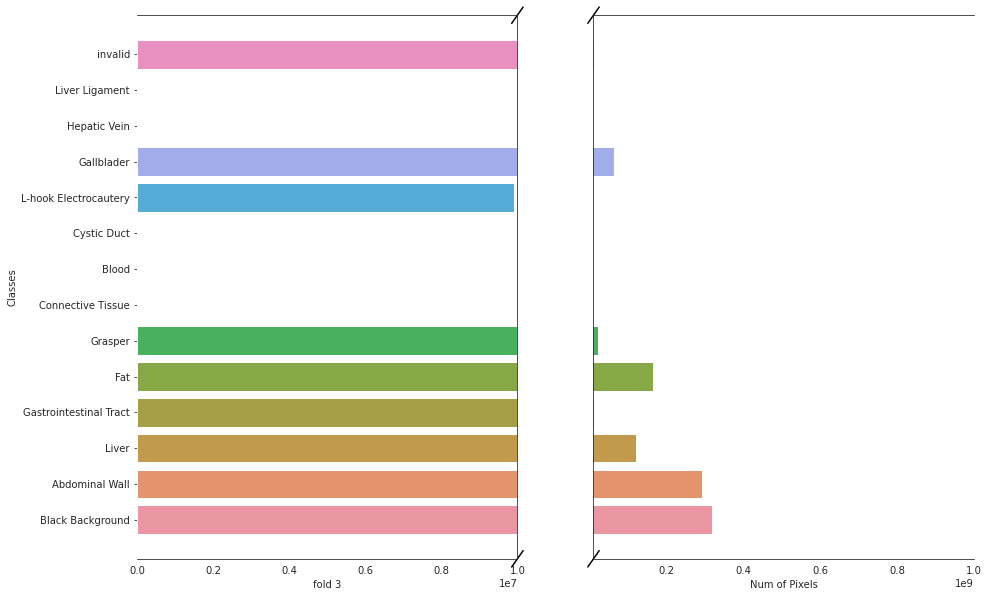

In [105]:
brokenPlot('fold 1','Label',df,10000000,10000000,1000000000)
brokenPlot('fold 2','Label',df,10000000,10000000,1000000000)
brokenPlot('fold 3','Label',df,10000000,10000000,1000000000)

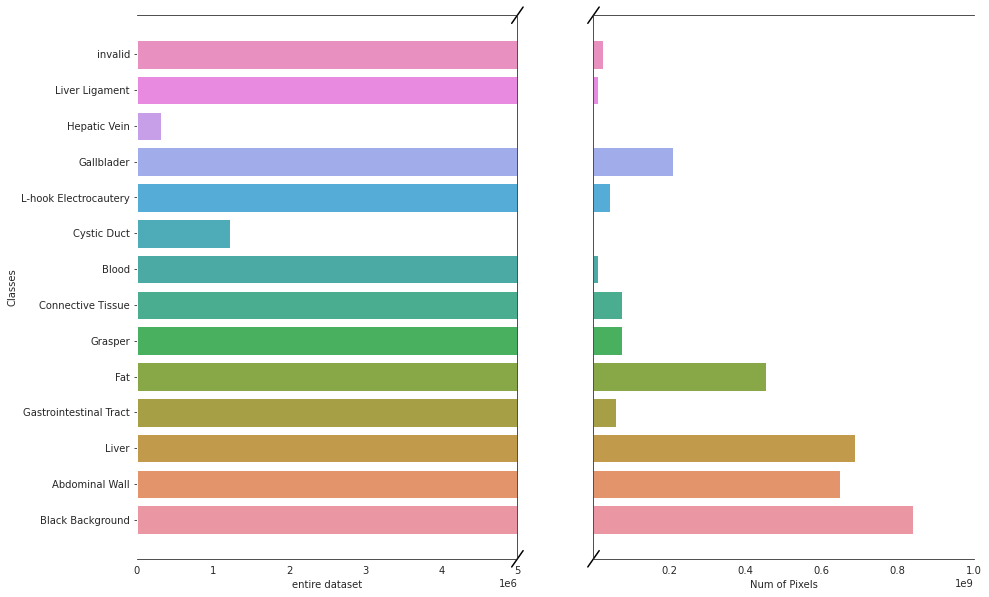

In [102]:
brokenPlot('entire dataset','Label',df,5000000,1000000,1000000000)

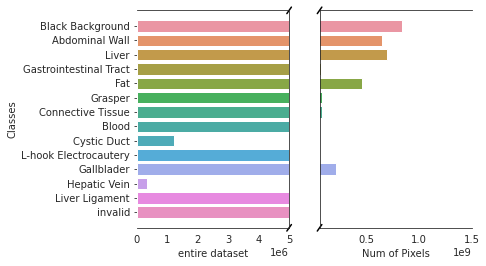

In [64]:
new_style = {'grid': False}
sns.set_style("white")
f, (ax,ax2) = plt.subplots(ncols=2, nrows=1, sharex='col')

# plot the same data on both axes
ax = sns.barplot(x='entire dataset', y='Label', data=df, ax=ax, orient='h')
ax2 = sns.barplot(x='entire dataset', y='Label', data=df, ax=ax2, orient='h')

# zoom-in / limit the view to different portions of the data
ax2.set_xlim(50000000, 1500000000)  # outliers only
ax.set_xlim(0, 5000000)  # most of the data

# hide the spines between ax and ax2
ax.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.yaxis.tick_left()
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel('Num of Pixels')
#ax2.tick_params(labelleft=False)  # don't put tick labels at the top
#ax2.yaxis.tick_right()
ax.set_ylabel("Classes")
ax2.set_ylabel("")

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)       
ax.plot((1-d, 1+d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1- d, 1+ d), **kwargs)  
ax2.plot((-d, +d), (-d, +d), **kwargs)  

plt.show()

In [ ]:
# the upper part does not need its own x axis as it shares one with the lower part
ax1.get_xaxis().set_visible(False)

# by default, each part will get its own "Latency in ms" label, but we want to set a common for the whole figure
# first, remove the y label for both subplots
ax1.set_ylabel("")
ax2.set_ylabel("")
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.05, 0.55, 'Latency in ms', va='center', rotation='vertical')

# by default, seaborn also gives each subplot its own legend, which makes no sense at all
# soe remove both default legends first
ax1.get_legend().remove()
ax2.get_legend().remove()
# then create a new legend and put it to the side of the figure (also requires trial and error)
ax2.legend(loc=(1.025, 0.5), title="Design")

# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
f.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85)
#sns.despine(left=True, bottom=True)

plt.show()

In [ ]:
print((df['12_3']+df['13_2']+df['23_1'])/3)

In [ ]:
rdf = pd.DataFrame()
rdf['label'] = df['Label']
rdf['mIoU'] = (df['12_3']+df['13_2']+df['23_1'])/3

In [ ]:
rdf.to_excel("results.xlsx",index=False)

In [ ]:
rdf

In [101]:
import json
f = open('cholecSegClasses.json')
data = json.load(f)
print(data)

{'classes': [{'id': '0', 'name': 'Black Background', 'color': '[127,127,127]', 'super-category': 'misc'}, {'id': '1', 'name': 'Abdominal Wall', 'color': '[210,140,140]', 'super-category': 'organ'}, {'id': '2', 'name': 'Liver', 'color': '[255,114,114]', 'super-category': 'organ'}, {'id': '3', 'name': 'Gastrointestinal Tract', 'color': '[231,70,156]', 'super-category': 'organ'}, {'id': '4', 'name': 'Fat', 'color': '[186,183,75]', 'super-category': 'organ'}, {'id': '5', 'name': 'Grasper', 'color': '[170,255,0]', 'super-category': 'instrument'}, {'id': '6', 'name': 'Connective Tissue', 'color': '[255,85,0]', 'super-category': 'organ'}, {'id': '7', 'name': 'Blood', 'color': '[255,0,0]', 'super-category': 'fluid'}, {'id': '8', 'name': 'Cystic Duct', 'color': '[255,255,0]', 'super-category': 'organ'}, {'id': '9', 'name': 'L-hook Electrocautery', 'color': '[169,255,184]', 'super-category': 'instrument'}, {'id': '10', 'name': 'Gallblader', 'color': '[255,160,165]', 'super-category': 'organ'}, {

In [102]:
color2id = dict()
color2num = dict()
id2num = dict()
classes = [data['classes'][x]['name'] for x in range(0,13)]
colors = [data['classes'][x]['color'] for x in range(0,13)]
for i in range(0,13):
    color2id[colors[i]] = classes[i]
for i in range(0,13):
    color2num[colors[i]] = 0
    id2num[classes[i]] = 0
id2num['invalid'] = 0

In [127]:
print(color2id['[169,255,184]'])
print(color2id.keys())
print(id2num)

L-hook Electrocautery
dict_keys(['[127,127,127]', '[210,140,140]', '[255,114,114]', '[231,70,156]', '[186,183,75]', '[170,255,0]', '[255,85,0]', '[255,0,0]', '[255,255,0]', '[169,255,184]', '[255,160,165]', '[0,50,128]', '[111,74,0]'])
{'Black Background': 0, 'Abdominal Wall': 0, 'Liver': 0, 'Gastrointestinal Tract': 0, 'Fat': 0, 'Grasper': 0, 'Connective Tissue': 0, 'Blood': 0, 'Cystic Duct': 0, 'L-hook Electrocautery': 0, 'Gallblader': 0, 'Hepatic Vein': 0, 'Liver Ligament': 0, 'invalid': 0}


In [142]:
import cv2,os

In [143]:
test1 = './cholec_1_test/test/groundtruth'
cholec_p1 = './cholec_12_3/test/groundtruth'
cholec_p2 = './cholec_13_2/test/groundtruth'
cholec_p3 = './cholec_23_1/test/groundtruth'
cholec_list = [cholec_p1,cholec_p2,cholec_p3]
id2num_1 = id2num.copy()
id2num_2 = id2num.copy()
id2num_3 = id2num.copy()


In [144]:
def getLabel(img):
    label = set()
    h,w,c = img.shape
    for i in range(0,h):
        for j in range(0,w):
            pixel = img[i,j,:]
            pixel = pixel[::-1]
            #print(pixel)
            color = ','.join(str(e) for e in pixel)
            color = '['+color+']'
            #if color == '[169,255,184]':
            #    print("found L-hook")
            #label.add(color)
            if color in color2id.keys():
                #print(color)
                label.add(color2id[color])
            else:
                label.add('invalid')
    #print(label)
    return label

def getSetLabel(path, id2num):
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename))
        labels = getLabel(img)
        for l in labels:
            id2num[l] += 1
    return id2num

In [145]:
l = set()
for filename in os.listdir(cholec_p3):
    if filename == '12_frame_15861_endo_color_mask.png':
        img = cv2.imread(os.path.join(cholec_p3,filename))
        labels = getLabel(img)
        l.update(labels)
print(l)

{'Liver', 'Hepatic Vein', 'L-hook Electrocautery', 'Black Background', 'invalid', 'Grasper', 'Fat', 'Abdominal Wall', 'Gallblader', 'Connective Tissue', 'Gastrointestinal Tract'}


In [146]:
id2num_1 = getSetLabel(cholec_p1,id2num_1)
id2num_2 = getSetLabel(cholec_p2,id2num_2)
id2num_3 = getSetLabel(cholec_p3,id2num_3)

In [147]:
print(id2num_3)

{'Black Background': 2779, 'Abdominal Wall': 2312, 'Liver': 2800, 'Gastrointestinal Tract': 1664, 'Fat': 2480, 'Grasper': 1986, 'Connective Tissue': 1600, 'Blood': 692, 'Cystic Duct': 248, 'L-hook Electrocautery': 1685, 'Gallblader': 2256, 'Hepatic Vein': 317, 'Liver Ligament': 240, 'invalid': 2746}


In [148]:
print(id2num_1,id2num_2,id2num_3)

{'Black Background': 2480, 'Abdominal Wall': 2480, 'Liver': 2480, 'Gastrointestinal Tract': 469, 'Fat': 2480, 'Grasper': 2262, 'Connective Tissue': 0, 'Blood': 0, 'Cystic Duct': 0, 'L-hook Electrocautery': 569, 'Gallblader': 2458, 'Hepatic Vein': 0, 'Liver Ligament': 0, 'invalid': 2480} {'Black Background': 2795, 'Abdominal Wall': 2463, 'Liver': 2800, 'Gastrointestinal Tract': 2425, 'Fat': 2550, 'Grasper': 1772, 'Connective Tissue': 0, 'Blood': 0, 'Cystic Duct': 0, 'L-hook Electrocautery': 0, 'Gallblader': 2147, 'Hepatic Vein': 0, 'Liver Ligament': 0, 'invalid': 2800} {'Black Background': 2779, 'Abdominal Wall': 2312, 'Liver': 2800, 'Gastrointestinal Tract': 1664, 'Fat': 2480, 'Grasper': 1986, 'Connective Tissue': 1600, 'Blood': 692, 'Cystic Duct': 248, 'L-hook Electrocautery': 1685, 'Gallblader': 2256, 'Hepatic Vein': 317, 'Liver Ligament': 240, 'invalid': 2746}


In [149]:
import pandas as pd

In [150]:
data1 = pd.DataFrame.from_dict(id2num_1,orient='index')
data2 = pd.DataFrame.from_dict(id2num_2,orient='index')
data3 = pd.DataFrame.from_dict(id2num_3,orient='index')

In [151]:
newdata = pd.concat([data1, data2], axis=1)
newdata = pd.concat([newdata, data3], axis=1)

In [152]:
newdata.columns = ['fold 3','fold 2','fold 1']

In [153]:
newdata['total'] = newdata['fold 1']+newdata['fold 3']+newdata['fold 2']

In [154]:
newdata['fold 1&2'] = (newdata['fold 1']+newdata['fold 2'])#/5600
newdata['fold 1&3'] = (newdata['fold 1']+newdata['fold 3'])#/5600
newdata['fold 2&3'] = (newdata['fold 3']+newdata['fold 2'])#/(2480+2800)

In [155]:
newdata['entire dataset'] = newdata['total']#/(5600+2480)

In [156]:
newdata = newdata.rename(columns={"part1": "fold 1", "part2": "fold 2", "part3": "fold 3"})
newdata['fold 1'] = (newdata['fold 1'])#/2800
newdata['fold 2'] = (newdata['fold 2'])#/2800
newdata['fold 3'] = (newdata['fold 3'])#/(2480)

<AxesSubplot:title={'center':'Frame-Level Class Distribution Frequency'}>

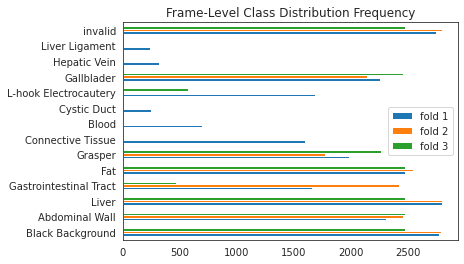

In [157]:
newdata.plot(y=['fold 1', 'fold 2', 'fold 3'], kind="barh",title="Frame-Level Class Distribution Frequency")

In [158]:
#print(newdata)
print(classes)
newdata = newdata.rename(columns={"invalid": "Invalid"}) 
newdata['Label'] = classes

['Black Background', 'Abdominal Wall', 'Liver', 'Gastrointestinal Tract', 'Fat', 'Grasper', 'Connective Tissue', 'Blood', 'Cystic Duct', 'L-hook Electrocautery', 'Gallblader', 'Hepatic Vein', 'Liver Ligament']


ValueError: Length of values (13) does not match length of index (14)

In [ ]:
classes = [data['classes'][x]['name'] for x in range(0,13)]
for i in range(0,13):
    newdata['Label'][i] = classes[i]
newdata['Label'][13] = "Invalid"

In [ ]:
newdata

In [ ]:
brokenPlot('fold 1','Label',newdata,1000,1500,3000)
brokenPlot('fold 2','Label',newdata,1000,1500,3000)
brokenPlot('fold 3','Label',newdata,1000,1500,3000)

<AxesSubplot:title={'center':'Frame-Level Class Distribution Frequency'}>

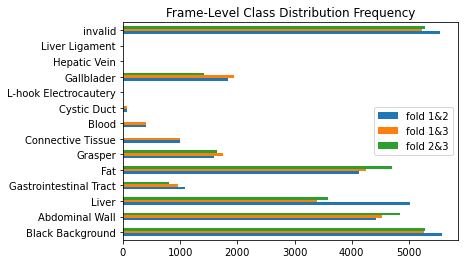

In [39]:
newdata.plot(y=['fold 1&2', 'fold 1&3', 'fold 2&3'], kind="barh",title="Frame-Level Class Distribution Frequency")

<AxesSubplot:title={'center':'Frame-Level Class Distribution Frequency'}>

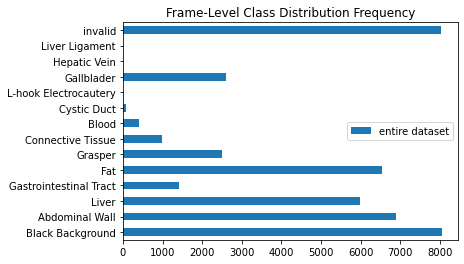

In [40]:
newdata.plot(y=['entire dataset'], kind="barh",title="Frame-Level Class Distribution Frequency")

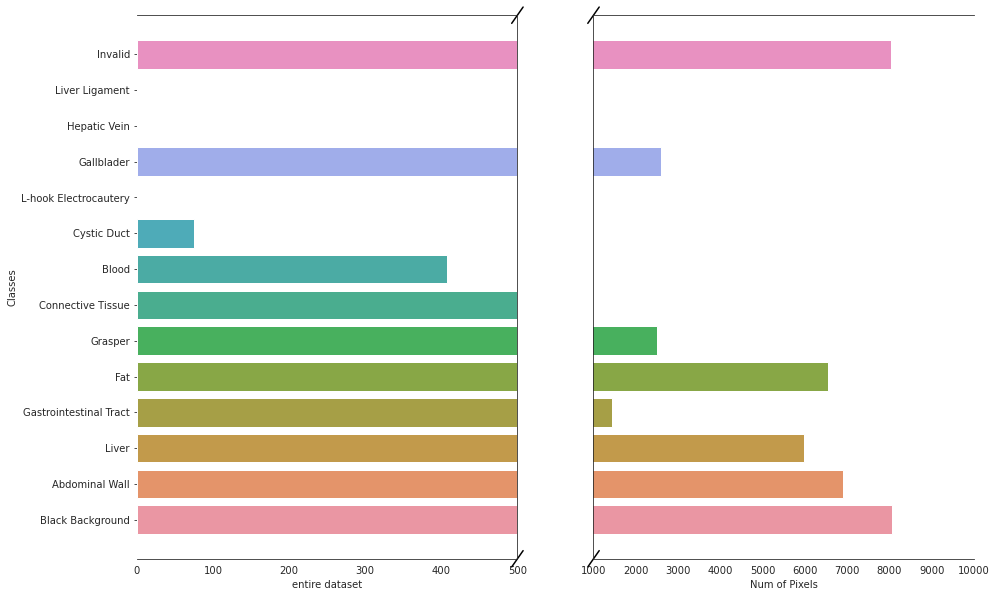

In [100]:
brokenPlot('entire dataset','Label',newdata,500,1000,10000)